In [ ]:
import random as rd
import pandas as pd
import math

Variant = 7
rd.seed(Variant)
Str1 = 'qwertyuioplkjhgfdsazxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'
N = rd.randint(20,40)
s1 = ''
for i in range(N):
    s1 += Str1[rd.randint(0, len(Str1)-1)]
D = '!@#$%&*+:;|'[rd.randint(0,10)]
N1 = rd.randint(3,30)
N2 = int(N1 * (N1 + 1) / 2)
if (int(N2/N1) - math.floor(N2/N1)) == 0:
    M = int(N2 / N1)
    K = int(N2 / M)
else:
    M = int(N2 / (N1 + 1))
    K = int(N2 / M)
N4 = rd.randint(123432, 5645634534)
Data  = pd.DataFrame({'Задание':[1,2,3,4,5],'Параметры':['S='+s1,[D, 'N='+str(N2),
                    'M ='+str(M), 'K = '+str(K)],'-','N='+str(N4),'-']})
Data

,Задание,Параметры
0,1,S=pmHrtOubSrUheyWQtfyPWrAigGGSrA
1,2,"[;, N=120, M =8, K = 15]"
2,3,-
3,4,N=4508075204
4,5,-


# 1 задача

```
format ELF64
public _start


section '.bss' writeable
    string db 0xA,'pmHrtOubSrUheyWQtfyPWrAigGGSrA'
    string_length dq 31
    pointer db ?

section '.text' executable
_start:

    mov rcx, [string_length]
    .iter:
        push rcx
        mov al, [string+rcx]
        call print_symb
        pop rcx
        dec rcx
        cmp rcx, 0
        jne .iter ; выход как только 0
    mov al, 0xA
    call print_symb
    call exit

print_symb:
  mov [string], al
  mov rax, 4
  mov rbx, 1
  mov rcx, string
  mov rdx, 1
  int 0x80
  ret
    ; Завершение программы
exit:
  mov eax, 1
  mov ebx, 0
  int 0x80
```



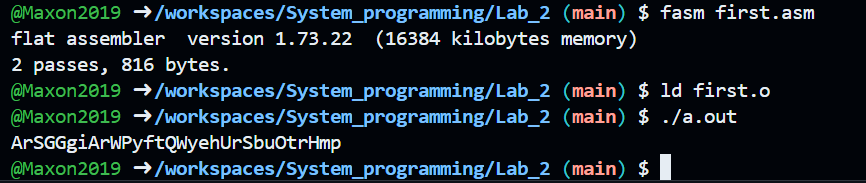

# 2 задача



```
format ELF64
public _start

section '.data' writeable
    pointer db 8 dup (';'), 0xA ; Заполняем 8 символами ';' и сразу добавим перевод строки

section '.text' executable
_start:
    mov rcx, 15             ; Количество строк
    .iter:
        push rcx
        call print_symb
        pop rcx
        dec rcx
        jne .iter ; выход как только 0
    call exit

print_symb:
  mov rax, 4
  mov rbx, 1
  mov rcx, pointer
  mov rdx, 9
  int 0x80
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80
```



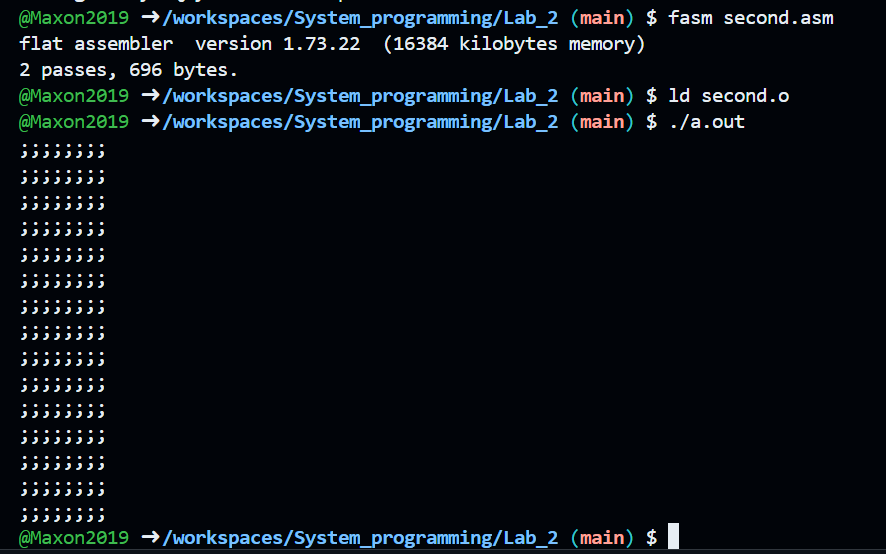

# 3 задача



```
format ELF64

public _start
public exit
public print_symb

section '.bss' writable
  array db 15 dup (';')          
  newline db 15 dup (0xA)  
  place db 1
  count dq 0                

section '.text' executable
  _start:
    xor rsi, rsi    

    .iter1:              
      xor rdi, rdi  

      mov rbx, [count]
      inc rbx
      mov [count], rbx  

      .iter2:
        mov al, [array + rdi]   
        call print_symb        
        inc rdi                
        cmp rdi, [count]           
        jne .iter2             

      ; вывод новой строки
      mov al, [newline + rsi]    
      call print_symb            

      inc rsi                  
      cmp rsi, 15                
      jne .iter1             
    call exit                  

print_symb:
  push rax
  mov [place], al
  mov eax, 4
  mov ebx, 1
  mov ecx, place
  mov edx, 1
  int 0x80
  pop rax
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80
```



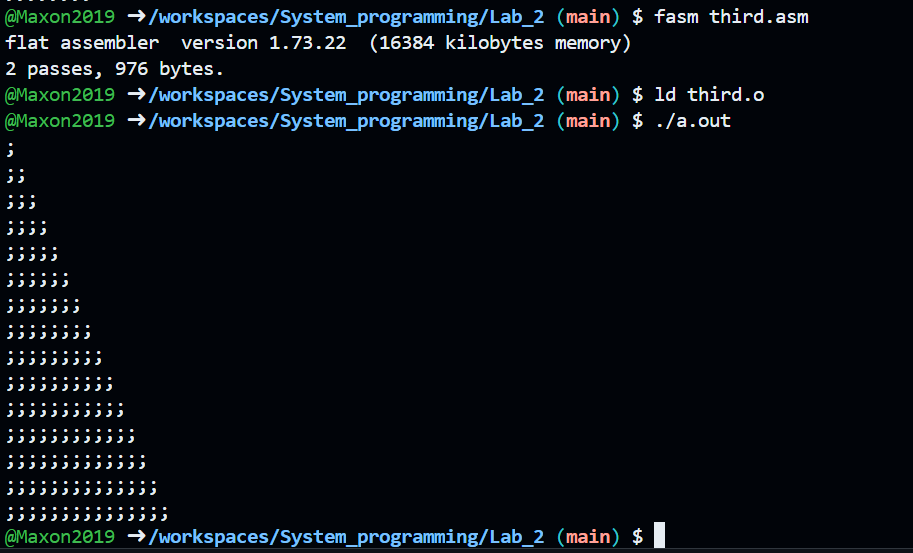

# 4 задача



```
format ELF64
public _start

section '.bss' writeable
    number dq 4508075204         ; Заданное число
    sum dq 0                     ; сумма цифор
    string db ?
    cycle dq 0

section '.text' executable
_start:
    mov rax, [number]
    mov rcx, 10
    xor rbx, rbx

    ; суммирование цифр числа
    .iter:
      xor rdx, rdx
      div rcx
      add [sum], rdx
      cmp rax,0
    jne .iter

    ;перевод суммы в строку
    xor rax,rax
    mov rax, [sum]
    mov rcx, 10
    xor rbx, rbx

    .iter1:
      xor rdx, rdx
      div rcx
      add rdx, '0'
      push rdx
      inc rbx
      cmp rax,0
    jne .iter1

    ; вывод суммы
    mov [cycle], rbx
    .iter2:
      pop rax
      call print_symb
      dec [cycle]
      cmp [cycle], 0
    jne .iter2

 call exit



print_symb:
  
  mov [string], al
  mov rax, 4
  mov rbx, 1
  mov rcx, string
  mov rdx, 1
  int 0x80
  ret

exit:
  mov eax, 1
  mov ebx, 0
  int 0x80
```



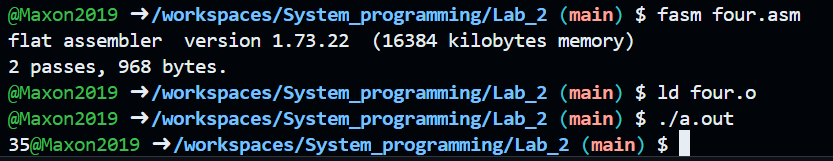

# 5 задача



```
#include <stdio.h>

int main() {
    long number= 4508075204, sum = 0;

    //printf("Введите число: ");
    //scanf("%d", &number);

    while (number > 0) {
        sum += number % 10;  // Добавляем последнюю цифру числа к сумме
        number /= 10;        // Удаляем последнюю цифру числа
    }

    printf("Сумма цифр: %d\n", sum);

    return 0;
}
```



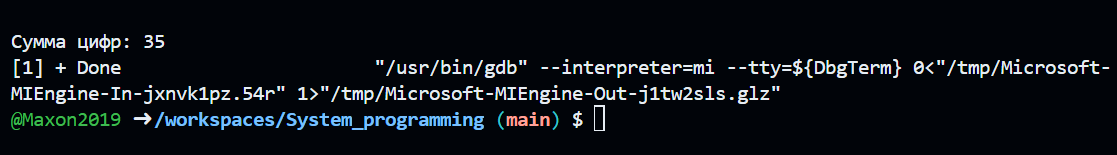


уменьшенный с++
```
# include <stdio.h>
int main() {
    long number = 4508075204;
    char sum = 0;    
    for (; number; number /= 10) sum += number % 10;    
    printf("Сумма цифр: %d\n", sum);
    return 0;
}
```

